# task2：linear regreesion （线性回归）
线性回归(Linear Regression)是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法。给定由d个属性描述的示例，试图学的一个通过属性的线性组合来进行预测的函数，即：
$f(x)=w_{1} x_{1}+w_{2} x_{2}+\cdots+w_{d} x_{d}+b$。
向量形式为：$f(x)=w^{T} x+b$。𝒘和𝑏学得之后，模型就得以确定。

$(w *, b *)=\underset{(w, b)}{\operatorname{argmin}} \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2}$

非线性模型（nonlinear model）可在线性模型的基础上通过引入层级结构或高维映射而得。

对离散属性的处理：
      若属性值间存在“序”（order）关系,可通过连续化将其转化为连续值，例如二值属性“身高”的取值“高”“矮”可转化为{1.0,0.0}，三值属性“高度”的取值“高”“中”“低”可转化为{1.0,0.5,0.0}；
       若属性值间不存在序关系，假定有k个属性值，则通常转化为k维向量，例如属性“瓜类”的取值“西瓜”“南瓜”“黄瓜”可转化为（0,0,1），（0,1,0），（1,0,0）。若将无序属性连续化，则会不恰当地引入序关系，对后续处理如距离计算等造成误导。



In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris

In [41]:
path='ex1data1.txt'
data=pd.read_csv(path,names=['population','profit'])
data.head()


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [42]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


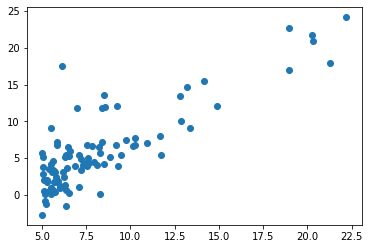

In [44]:
x=data['population']
y=data['profit']
plt.scatter(x,y)

## 计算成本函数
现在让我们使用梯度下降来实现线性回归，以最小化成本函数。
首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [46]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [47]:
data.insert(0, 'Ones', 1)
data.head(5)

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [54]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列
X = np.matrix(X.values)
y = np.matrix(y.values)
#初始化
theta = np.matrix(np.array([0,0]))
theta

matrix([[0, 0]])

In [55]:
computeCost(X, y, theta)

32.072733877455676

## batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [56]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [57]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

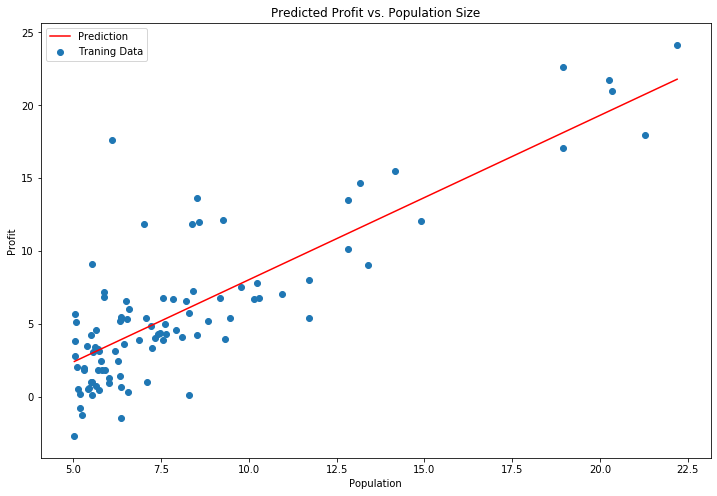

In [59]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

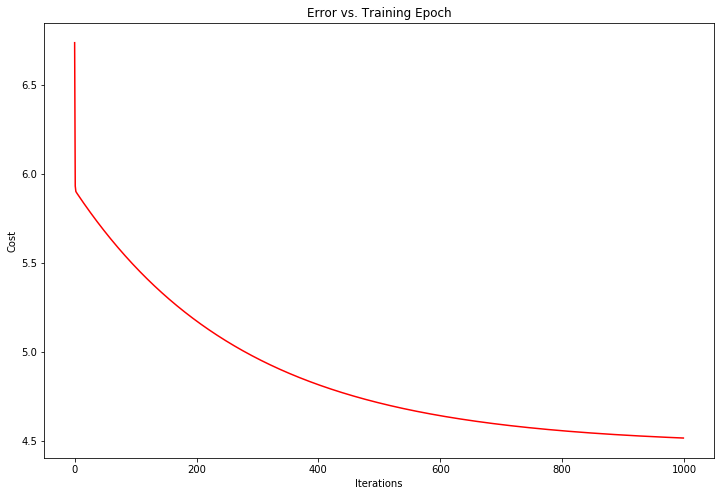

In [60]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数

In [64]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

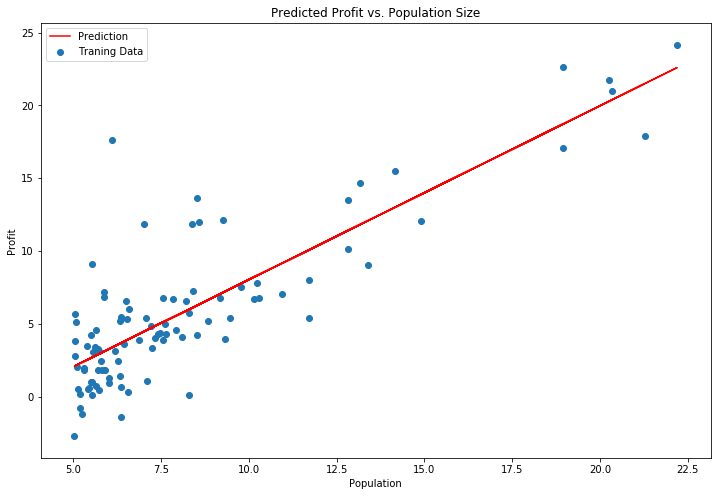

In [65]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()